In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = fetch_california_housing()

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.shape

(20640, 9)

In [8]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

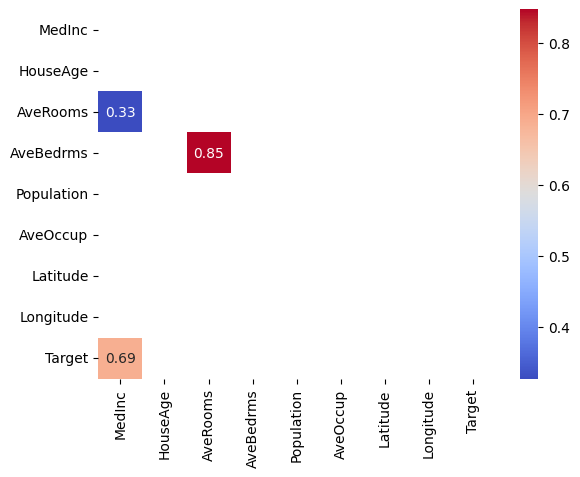

In [ ]:
threshold = 0.3
mask_lower = df.corr() < threshold
mask_upper = np.triu(np.ones_like(df.corr(), dtype=bool))
mask_combined = mask_lower | mask_upper
sns.heatmap(df.corr(), annot=True, mask=mask_combined, cmap='coolwarm')
plt.show()

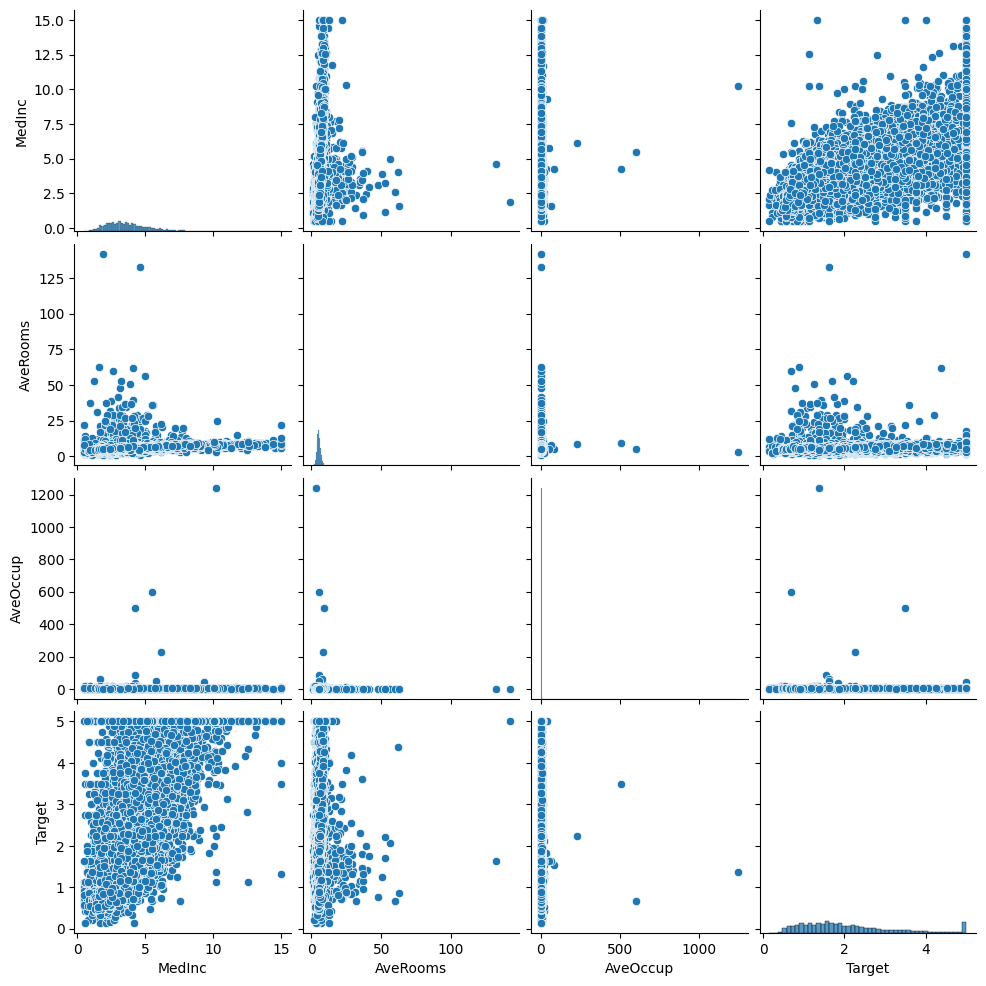

In [14]:
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'Target']])
plt.show()

In [18]:
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [20]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 0.4717943691423984
R² Score: 0.8301370561019205


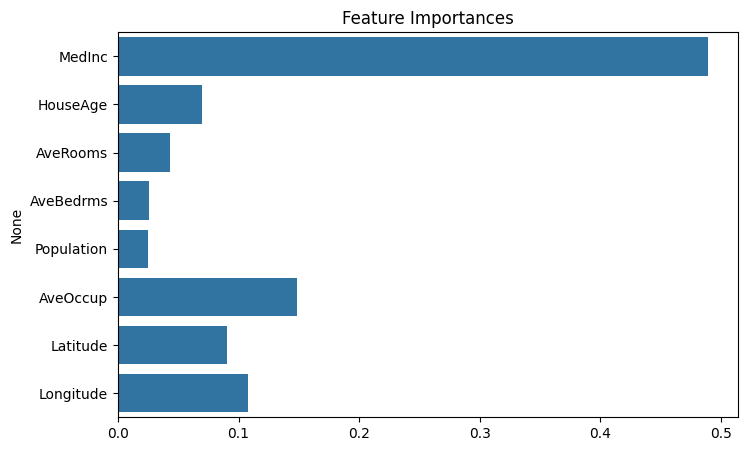

In [21]:
importances = xgb_model.feature_importances_
features = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()


In [26]:
df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


In [24]:
sample = pd.DataFrame([{
	'MedInc': 8.3252,
	'HouseAge': 41.0,
	'AveRooms': 6.984127,
	'AveBedrms': 1.023810,
	'Population': 322.0,
	'AveOccup': 2.555556,
	'Latitude': 37.88,
	'Longitude': -122.23
}])

In [25]:
xgb_model.predict(sample)

array([4.0399737], dtype=float32)